# Bayesian Analysis Assignment
Michael Ciniello
qq201128

Full disclosure, I have taken most of this code from here and adjusted it for this experiment:
https://people.duke.edu/~ccc14/sta-663/PyMC3.html

My objective is to show that, when you increase the sample size of the new data, the posterior more closely resembles the distribution of the new data. The experiment models the distribution of a coin toss. 

In [65]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats
import logging
_logger = logging.getLogger("theano.gof.compilelock")


_logger.setLevel(logging.ERROR)

# Small sample of only 10 tosses

100%|█████████████████████████████████████| 1500/1500 [00:01<00:00, 795.71it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD7C780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D953780>]], dtype=object)

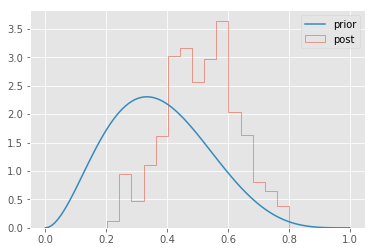

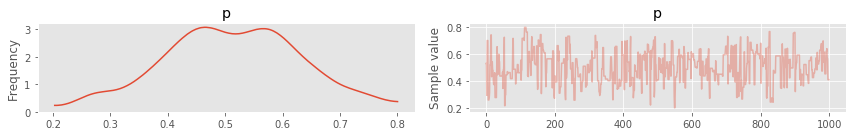

In [66]:
#priot dist parameters
alpha = 3
beta = 5

#observed data
num_tosses = 10
num_heads = 6

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=num_tosses, p=p, observed=num_heads)

    # inference
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, random_seed=123, progressbar=True)

plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');
pm.traceplot(trace)


# Larger sample of 100 tosses

100%|█████████████████████████████████████| 1500/1500 [00:01<00:00, 816.06it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001051E5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000108E2E80>]], dtype=object)

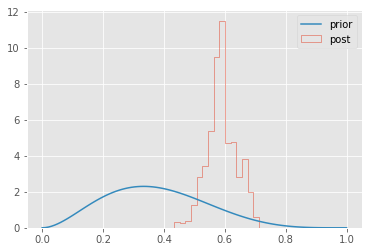

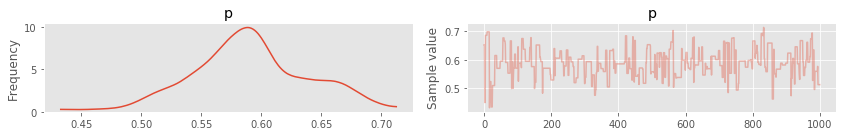

In [61]:
#priot dist parameters
alpha = 3
beta = 5

#observed data (Increase sample size)
num_tosses = 100
num_heads = 60

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=num_tosses, p=p, observed=num_heads)

    # inference
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, random_seed=123, progressbar=True)

plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
#plt.plot(x,stats.binom.pmf(x, num_tosses, p),label='gdsfds')
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');
pm.traceplot(trace)

# Even larger sample of 1000 tosses

100%|████████████████████████████████████| 1500/1500 [00:01<00:00, 1217.46it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD47780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA10128>]], dtype=object)

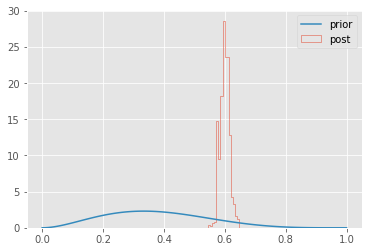

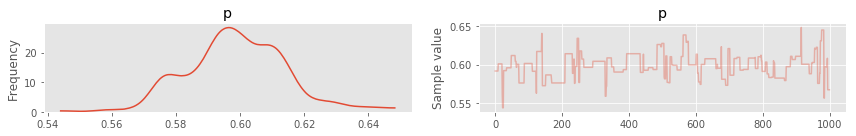

In [67]:
#priot dist parameters (Increase sample size)
alpha = 3
beta = 5

#observed data (Increase sample size)
num_tosses = 1000
num_heads = 600

niter = 1000
with pm.Model() as model: # context management
    # define priors
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # define likelihood
    y = pm.Binomial('y', n=num_tosses, p=p, observed=num_heads)

    # inference
    step = pm.Metropolis() # Have a choice of samplers
    trace = pm.sample(niter, step, random_seed=123, progressbar=True)

plt.hist(trace['p'], 15, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
#plt.plot(x,stats.binom.pmf(x, num_tosses, p),label='gdsfds')
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');
pm.traceplot(trace)

# Conclusion:
As we can see from this analysis, each time the 'num_tosses' is increased, the posterior distribution forms more tightly around the maximum likelihood of the binomial function (the likelihood).